In [3]:
%matplotlib inline
from pinn.io import load_ds
from ase.io import write
from ase import Atoms
import matplotlib.pyplot as plt
import numpy as np
from pinn.utils import get_atomic_dress


In [19]:
ds = load_ds('../datasets/pils-v3-filtered.yml').take(2000)
e, residue = get_atomic_dress(ds, [1,6,7,8])

(array([  2.,   1.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,
          0.,   4.,   3.,   7.,  11.,   5.,  10.,   7.,   7.,   5.,   8.,
         12.,  15.,   6.,  11.,  10.,  24.,  10.,  10.,  20.,  16.,  16.,
         10.,  13.,  26.,  37.,  29.,  46.,  53.,  83., 129., 189., 316.,
        414., 237., 131.,  54.,   4.,   5.]),
 array([-0.86554077, -0.84447632, -0.82341187, -0.80234741, -0.78128296,
        -0.76021851, -0.73915405, -0.7180896 , -0.69702515, -0.67596069,
        -0.65489624, -0.63383179, -0.61276733, -0.59170288, -0.57063843,
        -0.54957397, -0.52850952, -0.50744507, -0.48638062, -0.46531616,
        -0.44425171, -0.42318726, -0.4021228 , -0.38105835, -0.3599939 ,
        -0.33892944, -0.31786499, -0.29680054, -0.27573608, -0.25467163,
        -0.23360718, -0.21254272, -0.19147827, -0.17041382, -0.14934937,
        -0.12828491, -0.10722046, -0.08615601, -0.06509155, -0.0440271 ,
        -0.02296265, -0.00189819,  0.01916626,  0.04023071,  0.06129517,
 

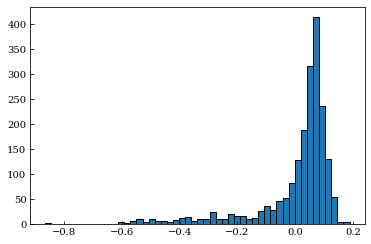

In [20]:
plt.hist(residue, 50, ec='k')

In [16]:
e_list = []
f_list = []
traj = []
for datum in ds.take(2000).as_numpy_iterator():
    natoms = len(datum['elems'])
    e_list.append(datum['e_data']/natoms)
    f_list.append(np.diag(datum['cell']).flatten())
    traj.append(Atoms(datum['elems'], positions=datum['coord'], cell=datum['cell'], pbc=True))
f_list = np.concatenate(f_list)



In [14]:
e_list_1 = e_list.copy()
f_list_1 = f_list.copy()

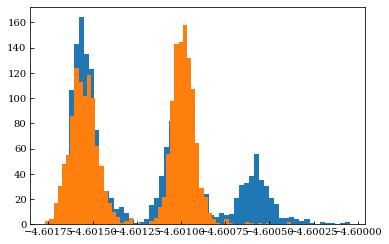

In [12]:
plt.hist(e_list, 59)
plt.hist(e_list_1, 59);
